In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
data=pd.read_csv('B:\MY Documents\suv-data\suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Purchased', ylabel='count'>

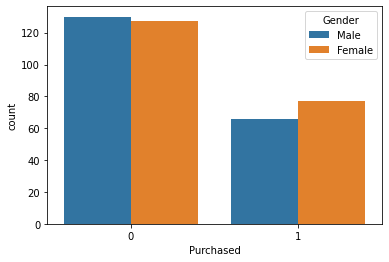

In [5]:
sns.countplot(x='Purchased', hue='Gender', data=data)

<AxesSubplot:ylabel='Frequency'>

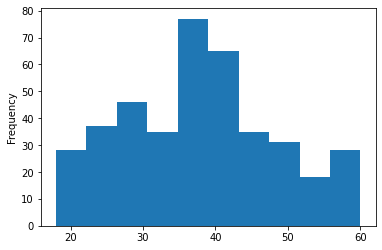

In [6]:
data['Age'].plot.hist()

In [7]:
data.groupby(by='Purchased').median()

,User ID,Age,EstimatedSalary
Purchased,,,
0,15693264.0,34.0,61000.0
1,15694829.0,47.0,90000.0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

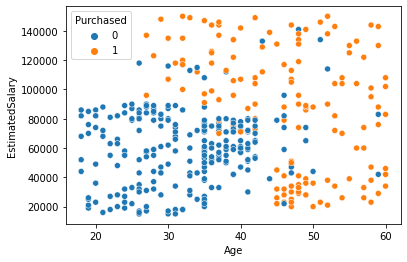

In [8]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)

In [9]:
X = data.iloc[:,[2,3]].values
y = data['Purchased'].values

In [10]:
X[:10],y[:10]

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.fit_transform(X_test)

In [14]:
logreg=LogisticRegression()
logreg.fit(X_train_new, y_train)

LogisticRegression()

In [15]:
y_pred = logreg.predict(X_test_new)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120



# Confusion matrix


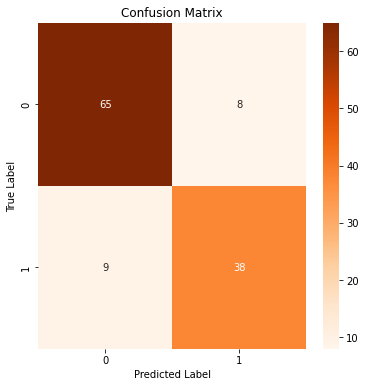

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY DECISION TREE = ", accuracy*100)

ACCURACY DECISION TREE =  85.83333333333333


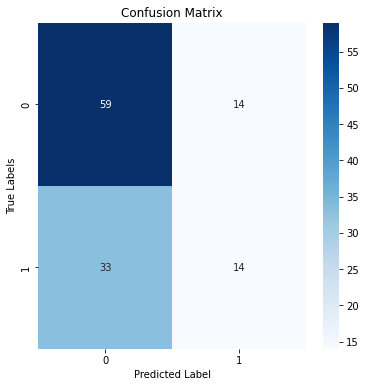

Accuracy by Multinomial : 60.83333333333333


In [19]:
from sklearn.naive_bayes import MultinomialNB 
c = MultinomialNB()
c.fit(X_train, y_train)
y_pred = c.predict(X_test)
con_mt = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix

plt.figure(figsize=(6, 6))
sns.heatmap(con_mt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Labels")
plt.show()

#ACCURACY:
AC = accuracy_score(y_test, y_pred)
print("Accuracy by Multinomial :", AC*100)